In [20]:
import numpy as np

# first lets import and format our data

# example data
my_data = np.genfromtxt('set_a.csv', delimiter = ',')
head = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
label_dict = { 0.0:  'setosa', 1.0:  'versicolor', 2.0:  'virginica'}

In [21]:
# This class will represent the query use to split our data at each node in the tree
#  every node should have a different query associated with it
class Query:

    def __init__(self, feat, val):
        self.feat = feat ## a feautre of interset: ex petal color
        self.val = val   ## value of the feature o

    def match(self, data):
        val = data[self.feat]
        return val >= self.val
    
    def __repr__(self):
        s = "Is %s %s %s?" % (head[self.feat], ">=", str(self.val))
        return s

In [22]:
q = Query(1, 3)
print(q)

Is sepal_width >= 3?


In [23]:
# This function returns a dictionary with species as keys and 
#   their frequency in the dataset as values
def count_vals(data):
    count = {}
    for point in data:
        label = point[-1]
        if (label not in count):
            count[label] = 0
        count[label] += 1
    return count

In [24]:
count_vals(my_data)

{2.0: 54, 1.0: 25, 0.0: 21}

In [25]:
# This function splits the data based on a query
def partition(data, query): 
    true_points = []
    false_points = []
    for point in data:
        if (query.match(point)):
            true_points.append(point)
        else:
            false_points.append(point)
    return true_points, false_points

In [26]:
t, f = partition(my_data, q)
print(q)

Is sepal_width >= 3?


In [27]:
t ## i.e. the data set such that q is true

[array([7.3, 3.3, 6.6, 1.1, 2. ]),
 array([7.7, 3.9, 6.7, 1.6, 2. ]),
 array([4.8, 4.2, 4.2, 0.7, 1. ]),
 array([5.6, 4.3, 1.3, 0.3, 2. ]),
 array([4.8, 3.1, 1.8, 0.7, 2. ]),
 array([5.5, 3.1, 5. , 2.3, 2. ]),
 array([7.4, 3.3, 2.3, 0.1, 0. ]),
 array([4.4, 4. , 6.6, 0.2, 2. ]),
 array([4.6, 3.3, 1.5, 0.7, 0. ]),
 array([4.6, 3.8, 1.3, 0.8, 0. ]),
 array([5.6, 3.5, 5. , 2.5, 2. ]),
 array([5.8, 3.1, 6.8, 0.6, 2. ]),
 array([6.8, 3.5, 6. , 0.3, 2. ]),
 array([6.9, 3.9, 6.4, 0.7, 2. ]),
 array([5.3, 4. , 4.7, 1.6, 1. ]),
 array([7.3, 4.2, 3.5, 1.2, 1. ]),
 array([6.4, 4.1, 2.5, 0.8, 1. ]),
 array([5.7, 4.4, 6.6, 0.9, 2. ]),
 array([4.5, 4.4, 5.4, 0.1, 2. ]),
 array([7.5, 3.4, 4.9, 2.5, 2. ]),
 array([5.2, 3.9, 4.3, 1.2, 1. ]),
 array([6. , 3.3, 5.2, 2. , 2. ]),
 array([7.1, 4. , 2.4, 1.8, 0. ]),
 array([5.1, 4. , 1.8, 0.8, 0. ]),
 array([6.5, 4. , 5.9, 2.3, 1. ]),
 array([6.2, 3. , 3.5, 2.4, 2. ]),
 array([7.6, 3.5, 5.2, 1.6, 2. ]),
 array([5.1, 3. , 1.6, 1.5, 0. ]),
 array([4.9, 3. , 5.

In [32]:
import math as ma

# calculate entropy of a dataset
def entropy(data):
    c = count_vals(data)
    entropy = 0.0
    #For every class label "x" calculate the probability p(x)
    for item in c:
        prob = float(c[item])/len(data) 
        entropy -= prob * ma.log(prob,2) 
    return entropy

In [33]:
entropy(my_data)

1.452866232379231

In [34]:
# calculate information gain of a data and a split of the data
def info_gain(curr, left, right):
    num = float(len(left))
    den = num + float(len(right))
    prob = num/den
    a = prob * entropy(left)
    b = (1 - prob) * entropy(right)
    return curr - (a + b)

In [35]:
# chooses the split witht the highest information gain
def best_split(data):
    max_gain = 0
    best_query = None
    curr = entropy(data)
    n = len(data[0])-1
    for i in range(n):
        vals = set([point[i] for point in data])
        for val in vals:
            q = Query(i, val)
            t, f = partition(data, q)
            if (not(len(t) == 0 or len(f) == 0)):
                # if ^ is false, then there is no info gain, so juet move on
                gain = info_gain(curr, t, f)
                if (gain >= max_gain):
                    max_gain, best_query = gain, q     
    return max_gain, best_query

In [36]:
gain, query = best_split(my_data)
print(query)
print(gain)

Is petal_length >= 2.5?
0.5129420618456131


In [37]:
# This class will be an internal node for the disiscion tree
class Node:
    def __init__(self, q, t, f):
        self.query = q
        self.true_branch = t
        self.false_branch = f

# This class will be a leaf node for the disiscion tree
class Leaf:
    def __init__(self, data):
        d = count_vals(data)
        for i in range(3):
            old_key = float(i)
            if(old_key in d):
                new_key = label_dict[i]
                d[new_key] = d.pop(old_key)
        self.predictions = d
        # predictions ios a dictionary.  Ideally, this should have one item in the dict.
        #  it should have a key = one of the flowers and a val, the number of flowers in the set
        # When the length oif the dict is 1, we predict this flower.
        #  if the length of the dict is greater than 1, we will predict the flower with the most votres

In [38]:
def ID3(data):
    gain, query = best_split(data)
    if (gain == 0):
        return Leaf(data)
    t, f = partition(data, query)
    true_branch = ID3(t)
    false_branch = ID3(f)
    return Node(query, true_branch, false_branch)

In [39]:
tree = ID3(my_data)

In [40]:
def tree_print(n, ind = ""):
    if isinstance(n, Leaf):
        print(ind + "Predictions:", n.predictions)
        return 
    print(ind + str(n.query))
    print(ind + "True Branch")
    tree_print(n.true_branch, ind + "\t")
    print(ind + "False Branch")
    tree_print(n.false_branch, ind + "\t")

In [41]:
# Q1 Ans
tree_print(tree)

Is petal_length >= 2.5?
True Branch
	Is petal_length >= 4.6?
	True Branch
		Is sepal_length >= 6.8?
		True Branch
			Is petal_width >= 1.1?
			True Branch
				Predictions: {'virginica': 11}
			False Branch
				Is petal_width >= 1.0?
				True Branch
					Predictions: {'setosa': 1}
				False Branch
					Predictions: {'virginica': 4}
		False Branch
			Is sepal_length >= 6.4?
			True Branch
				Predictions: {'versicolor': 2}
			False Branch
				Is petal_length >= 4.9?
				True Branch
					Is sepal_width >= 2.2?
					True Branch
						Predictions: {'virginica': 18}
					False Branch
						Is petal_length >= 6.5?
						True Branch
							Predictions: {'versicolor': 1}
						False Branch
							Predictions: {'virginica': 2}
				False Branch
					Is petal_width >= 2.4?
					True Branch
						Predictions: {'virginica': 1}
					False Branch
						Predictions: {'versicolor': 1}
	False Branch
		Is petal_width >= 1.7?
		True Branch
			Is sepal_length >= 6.0?
			True Branch
				Predictions: {'virgin

In [42]:
# this function will return true if a given tree correcty labels a point, 
#   and false otherwise
def score_point(node, point):
    if(isinstance(node, Leaf)):
        d = node.predictions
        if(d == {}):
            print("something went wrong")
            return
        max_key = ""
        max_val = 0
        for item in d:
            if(d[item] > max_val):
                max_val = d[item]
                max_key = item
        return max_key == label_dict[point[-1]]
    
    q = node.query
    if(point[q.feat] >= q.val):
        return score_point(node.true_branch, point)
    else:
        return score_point(node.false_branch, point)

# runs score_point on many points and returns the percentager of correct awnsers
def score_points(tree, points):
    total = 0
    score = 0
    for point in points:
        if(score_point(tree, point)):
            score += 1
        total += 1
    return score/total



In [43]:
score_point(tree, [5.4, 4.1, 1.1, 0.8, 2. ])

True

In [44]:
score_point(tree, [5.4, 4.1, 1.1, 0.8, 1. ])

False

In [45]:
score_points(tree, [[5.4, 4.1, 1.1, 0.8, 1. ], [5.4, 4.1, 1.1, 0.8, 2. ]])

0.5

In [48]:
# we are adding a max depth parameter to imporve trainng speed,
#   and in some cases reduce overfitting
def ID3_mod(data, max_depth):
    gain, query = best_split(data)
    if (gain == 0 or max_depth == 0):
        return Leaf(data)
    
    t, f = partition(data, query)

    true_branch = ID3_mod(t, max_depth - 1)
    false_branch = ID3_mod(f, max_depth - 1)

    return Node(query, true_branch, false_branch)

In [49]:
t = ID3_mod(my_data, 4)
tree_print(t)

Is petal_length >= 2.5?
True Branch
	Is petal_length >= 4.6?
	True Branch
		Is sepal_length >= 6.8?
		True Branch
			Is petal_width >= 1.1?
			True Branch
				Predictions: {'virginica': 11}
			False Branch
				Predictions: {'setosa': 1, 'virginica': 4}
		False Branch
			Is sepal_length >= 6.4?
			True Branch
				Predictions: {'versicolor': 2}
			False Branch
				Predictions: {'versicolor': 2, 'virginica': 21}
	False Branch
		Is petal_width >= 1.7?
		True Branch
			Is sepal_length >= 6.0?
			True Branch
				Predictions: {'virginica': 13}
			False Branch
				Predictions: {'versicolor': 4}
		False Branch
			Predictions: {'versicolor': 17}
False Branch
	Is sepal_width >= 3.1?
	True Branch
		Is petal_length >= 1.2?
		True Branch
			Is sepal_width >= 3.3?
			True Branch
				Predictions: {'setosa': 14, 'virginica': 3}
			False Branch
				Predictions: {'virginica': 1}
		False Branch
			Predictions: {'virginica': 1}
	False Branch
		Predictions: {'setosa': 6}


In [50]:
# this function will take in a tree and checks if it each leaf, it makes one guess 
#  with ceartianty in this case return true, else return false

def is_complete(n):
    if (isinstance(n, Leaf)):
        if(len(n.predictions) > 1):
            return False
        elif (len(n.predictions) == 1):
            return True
        else:
            print("Something went wrong")
            return 123
    return is_complete(n.true_branch) and is_complete(n.false_branch)

In [51]:
# here we are going to run ID3_mod with i = 0,1,2... until we get a tree that is 100 percent accurate

def get_highest_depth(data):   # lol this is an oxy moron XD   
    i = 0
    while(True):
        print("Tree " + str(i) + ":\n")
        t = ID3_mod(data, i)
        tree_print(t)
        print()
        if(is_complete(t)):
            print("Tree " + str(i) + " has a max depth of " + str(i) + 
                  " and was the first tree to accuratley classify dataset A with 100% accuracy")
            return i
        i += 1
    
    # when we are out of the loop, trees[i] = ID3(my_data, i)
# for later convience
def get_highest_depth_no_print(data):   # lol this is an oxy moron XD   
    i = 0
    while(True):
        t = ID3_mod(data, i)
        if(is_complete(t)):
            return i
        i += 1

In [52]:
get_highest_depth(my_data)

Tree 0:

Predictions: {'setosa': 21, 'versicolor': 25, 'virginica': 54}

Tree 1:

Is petal_length >= 2.5?
True Branch
	Predictions: {'setosa': 1, 'versicolor': 25, 'virginica': 49}
False Branch
	Predictions: {'setosa': 20, 'virginica': 5}

Tree 2:

Is petal_length >= 2.5?
True Branch
	Is petal_length >= 4.6?
	True Branch
		Predictions: {'setosa': 1, 'versicolor': 4, 'virginica': 36}
	False Branch
		Predictions: {'versicolor': 21, 'virginica': 13}
False Branch
	Is sepal_width >= 3.1?
	True Branch
		Predictions: {'setosa': 14, 'virginica': 5}
	False Branch
		Predictions: {'setosa': 6}

Tree 3:

Is petal_length >= 2.5?
True Branch
	Is petal_length >= 4.6?
	True Branch
		Is sepal_length >= 6.8?
		True Branch
			Predictions: {'setosa': 1, 'virginica': 15}
		False Branch
			Predictions: {'versicolor': 4, 'virginica': 21}
	False Branch
		Is petal_width >= 1.7?
		True Branch
			Predictions: {'versicolor': 4, 'virginica': 13}
		False Branch
			Predictions: {'versicolor': 17}
False Branch
	Is se

10

In [53]:
import random as ra
 
# Split a dataset into k folds with randomization of datapoints
def k_fold_cross_validation_split(data, k):
    split = list()
    copy = list(data)
    fold_size = int(len(data) / k)
    for i in range(k):
        fold = list()
        while (fold_size > len(fold)):
            index = ra.randrange(len(copy))
            fold.append(copy.pop(index))
        split.append(fold)
    return split

In [54]:
split = k_fold_cross_validation_split(my_data, 10)
print(split)

[[array([7.3, 3.3, 6.6, 1.1, 2. ]), array([4.6, 3.3, 5.2, 0.3, 2. ]), array([4.8, 4.2, 4.2, 0.7, 1. ]), array([6.8, 3. , 2.8, 0.3, 1. ]), array([6.1, 2.9, 5.1, 0.6, 2. ]), array([7.1, 3.2, 2.6, 2.4, 2. ]), array([7.8, 4.2, 5.3, 1.9, 2. ]), array([5.9, 2.8, 3.1, 1.8, 1. ]), array([7.7, 2.8, 5.8, 1. , 0. ]), array([4.4, 4.1, 3.4, 1.8, 1. ])], [array([5.3, 4. , 4.7, 1.6, 1. ]), array([4.8, 3.1, 1.8, 0.7, 2. ]), array([6.4, 4.1, 2.5, 0.8, 1. ]), array([4.9, 3. , 2. , 1.5, 0. ]), array([5.6, 4.3, 1.3, 0.3, 2. ]), array([6.9, 3.3, 1.5, 1.5, 2. ]), array([6.2, 2.8, 3.6, 2.2, 2. ]), array([5.5, 4.3, 1.8, 0.3, 0. ]), array([7.7, 3.8, 3.5, 2.4, 2. ]), array([5.3, 2.7, 2.5, 1.5, 1. ])], [array([5.5, 4.3, 1.8, 0.6, 0. ]), array([5.8, 4.1, 4.5, 0.1, 1. ]), array([5.8, 2. , 5.8, 0.4, 2. ]), array([5.7, 4.4, 6.6, 0.9, 2. ]), array([4.6, 3.8, 1.3, 0.8, 0. ]), array([6.8, 3.5, 6. , 0.3, 2. ]), array([5. , 4. , 4.4, 2.5, 1. ]), array([7.5, 3.9, 1.6, 0.8, 0. ]), array([5.2, 3.9, 4.3, 1.2, 1. ]), array([4

In [55]:
import matplotlib.pyplot as plt

def plot_help(A, xlabel, ylabel):
    n = len(A)
    max_score = 0
    max_score_pos = 0
    z_scores = []
    for i in range(n):
        z = A[i]/n
        z_scores.append(z)
        if(z > max_score):
            max_score_pos = i
            max_score = z
    plt.plot(A)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    return max_score_pos

In [56]:
# this function will use k-fold cross validation to determine which depth 
#  to use to obtain the best accuracy for new data.

def k_fold_cross_val(data, k):
    # First we split the data into 10 equal subsets.
    split = k_fold_cross_validation_split(data, k)
    # For each pre-specified maximum depth, do
    scores_train = []
    scores_val = []
    for depth in range(get_highest_depth_no_print(data)):
        score_train = 0
        score_val = 0
        # Perform 10 rounds of learning.
        # On each round, 1/10 of the data is held out as 
        #   a validation set and the remaining examples
        #   are used as training data.
        for i in range(k):
            train = []
            validation = []
            for j in range(k):
                if(j == i):
                    validation = split[j]
                else:
                    train += split[j]
            train = np.array(train)
            validation = np.array(validation)
            # 4 Gernerate tree
            t = ID3_mod(train, depth)
            score_train += score_points(t, train)
            score_val += score_points(t, validation)
        scores_train.append(score_train)
        scores_val.append(score_val)    
    max_score_pos_train = plot_help(scores_train, "Depth",
                                    "Average Prediction Accuracies on Training Sets")
    max_score_pos_val = plot_help(scores_val, "Depth", 
                                  "Average Prediction Accuracies on Validation Sets")
    
    # retrun the depths of maximum accuracy for training and validation sets
    return max_score_pos_val

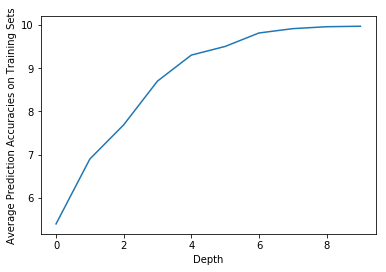

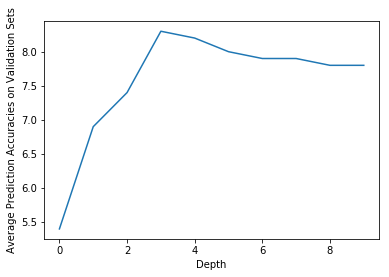

3

In [57]:
k_fold_cross_val(my_data, 10)

In [67]:
# now we will generate the tree using our maxdepth.  This fucntion returns the best tree

def best_tree(data):
    # use cross validation to determine best depth
    print("Cross Validation Printing:")
    depth = k_fold_cross_val(data, 10)
    # construct tree
    tree = ID3_mod(data, depth)
    print("Best Tree:\n")
    tree_print(tree)
    print("\n Predicion Accuracy Of Tree on Dataset A : "
         + str(score_points(tree, data)))
    return tree
    
    
    

Cross Validation Printing:


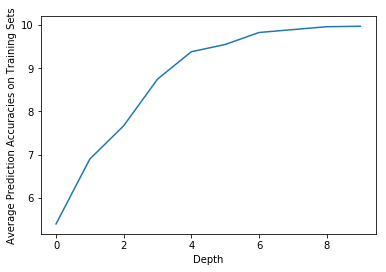

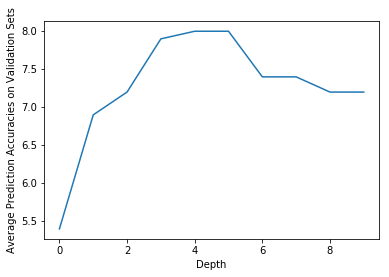

Best Tree:

Is petal_length >= 2.5?
True Branch
	Is petal_length >= 4.6?
	True Branch
		Is sepal_length >= 6.8?
		True Branch
			Is petal_width >= 1.1?
			True Branch
				Predictions: {'virginica': 11}
			False Branch
				Predictions: {'setosa': 1, 'virginica': 4}
		False Branch
			Is sepal_length >= 6.4?
			True Branch
				Predictions: {'versicolor': 2}
			False Branch
				Predictions: {'versicolor': 2, 'virginica': 21}
	False Branch
		Is petal_width >= 1.7?
		True Branch
			Is sepal_length >= 6.0?
			True Branch
				Predictions: {'virginica': 13}
			False Branch
				Predictions: {'versicolor': 4}
		False Branch
			Predictions: {'versicolor': 17}
False Branch
	Is sepal_width >= 3.1?
	True Branch
		Is petal_length >= 1.2?
		True Branch
			Is sepal_width >= 3.3?
			True Branch
				Predictions: {'setosa': 14, 'virginica': 3}
			False Branch
				Predictions: {'virginica': 1}
		False Branch
			Predictions: {'virginica': 1}
	False Branch
		Predictions: {'setosa': 6}

 Predicion Accuracy Of 

In [68]:
best_tree(my_data)

In [72]:
def final(file):
    t = best_tree(my_data)
    new_data = np.genfromtxt(file, delimiter = ',')
    print("\n Predicion Accuracy Of Tree on Dataset B : "
         + str(score_points(tree, new_data)))

Cross Validation Printing:


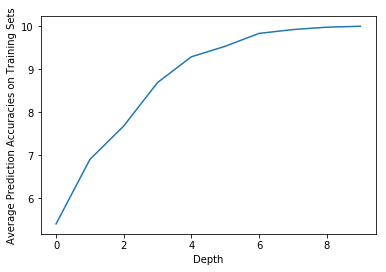

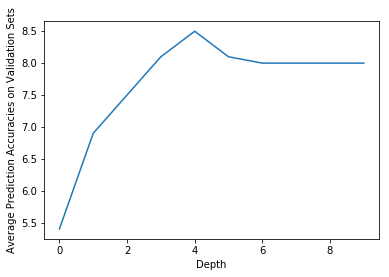

Best Tree:

Is petal_length >= 2.5?
True Branch
	Is petal_length >= 4.6?
	True Branch
		Is sepal_length >= 6.8?
		True Branch
			Is petal_width >= 1.1?
			True Branch
				Predictions: {'virginica': 11}
			False Branch
				Predictions: {'setosa': 1, 'virginica': 4}
		False Branch
			Is sepal_length >= 6.4?
			True Branch
				Predictions: {'versicolor': 2}
			False Branch
				Predictions: {'versicolor': 2, 'virginica': 21}
	False Branch
		Is petal_width >= 1.7?
		True Branch
			Is sepal_length >= 6.0?
			True Branch
				Predictions: {'virginica': 13}
			False Branch
				Predictions: {'versicolor': 4}
		False Branch
			Predictions: {'versicolor': 17}
False Branch
	Is sepal_width >= 3.1?
	True Branch
		Is petal_length >= 1.2?
		True Branch
			Is sepal_width >= 3.3?
			True Branch
				Predictions: {'setosa': 14, 'virginica': 3}
			False Branch
				Predictions: {'virginica': 1}
		False Branch
			Predictions: {'virginica': 1}
	False Branch
		Predictions: {'setosa': 6}

 Predicion Accuracy Of 

In [73]:
# ex.
final('set_a.csv')